In [2]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Embeded Datasets
from sklearn import datasets

## For shuffling the Dataset
from sklearn import utils

## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict

## Algorithms
from sklearn.svm import LinearSVC, SVC     ## Classification Problems
from sklearn.svm import LinearSVR, SVR     ## Regression Problems
from sklearn.neighbors import KNeighborsClassifier

## Metric
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
## Load another dataset -- moons dataset 
moons_data = datasets.make_moons(n_samples=1000, noise=0.2, shuffle=True, random_state=42) ## incresase noise -- more complex

## Features is the first 2D array, and the second vector is the target
X_train_moons = moons_data[0]
y_train_moons = moons_data[1]

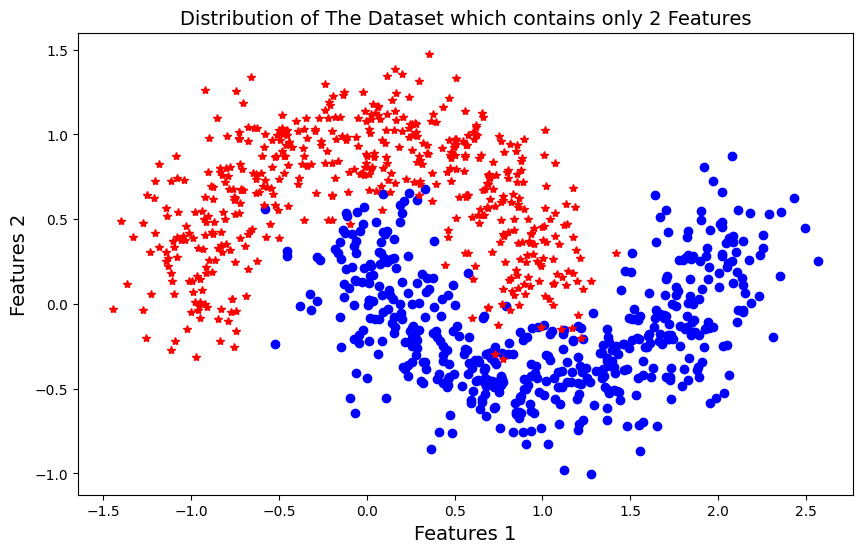

In [4]:
## Some EDA ---> Do it yourself and try SVM on another Dataset, but not big one
plt.figure(figsize=(10, 6))
plt.plot(X_train_moons[y_train_moons==1][:, 0], X_train_moons[y_train_moons==1][:, 1], 'bo', label='1')
plt.plot(X_train_moons[y_train_moons==0][:, 0], X_train_moons[y_train_moons==0][:, 1], 'r*', label='0')
plt.title('Distribution of The Dataset which contains only 2 Features', fontsize=14, c='k')
plt.xlabel('Features 1', fontsize=14, c='k')
plt.ylabel('Features 2', fontsize=14, c='k')
plt.show()

In [5]:
## Create a pipeline for imputing and scaling
feat_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer()),
                                ('scaler', StandardScaler())
                               ]
                        )

## fit and transform
X_train_2 = feat_pipeline.fit_transform(X_train_moons)

## Label as it is --, just copying to not overwrite and make the same name
y_train_2 = y_train_moons.copy()

### `SVM using polynomial kernel`

In [6]:
svc_moon_poly = SVC(C =4 ,kernel='poly' , coef0=1 , random_state=42 ,degree=3)
svc_moon_poly.fit(X_train_2,y_train_2)

SVC(C=4, coef0=1, kernel='poly', random_state=42)

In [7]:
y_pred_poly = svc_moon_poly.predict(X_train_2)
accuracy_score(y_train_2 , y_pred_poly)

0.977

In [8]:
poly_svm_acc_valid = cross_val_score(estimator=svc_moon_poly , X=X_train_2 , y = y_train_2 , cv=5 ,scoring='accuracy' , n_jobs=-1)

poly_svm_acc_valid.mean() ,poly_svm_acc_valid.std()

(0.9710000000000001, 0.011575836902790236)

In [9]:
poly_svm_pred_valid = cross_val_predict(estimator=svc_moon_poly , X=X_train_2, y = y_train_2 , cv=5 ,method='predict' , n_jobs=-1)

poly_svm_pred_valid.mean() ,poly_svm_pred_valid.std()

(0.505, 0.49997499937496875)

confmat_sgd =>
 [[483  17]
 [ 12 488]]
------------------------------------------------------------


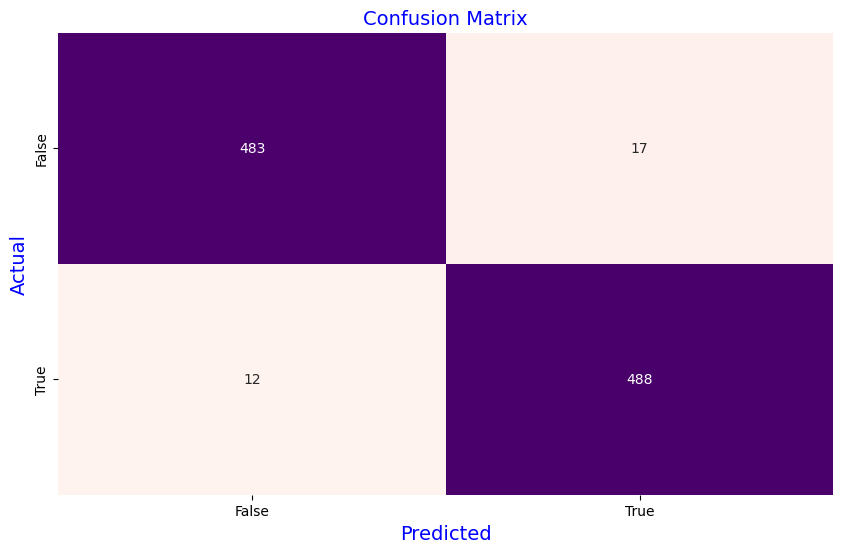

In [10]:
confmat_svm_poly = confusion_matrix(y_train_2,poly_svm_pred_valid)

print('confmat_sgd =>\n', confmat_svm_poly)

print('--'*30)


## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_svm_poly, fmt='g', annot=True, cbar=False, vmin=0, cmap='RdPu')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [11]:
## Precision and Recall score
precison_score_sgd = precision_score(y_train_2, poly_svm_pred_valid)
print('Precison Score using SGD =>', precison_score_sgd)

print('---'*20)

recall_score_sgd = recall_score(y_train_2, poly_svm_pred_valid)
print('Recall Score using SGD =>', recall_score_sgd)

print('---'*20)

class_repo_sgd = classification_report(y_train_2, poly_svm_pred_valid)
print('Classifcation Report using SGD => \n', class_repo_sgd)

Precison Score using SGD => 0.9663366336633663
------------------------------------------------------------
Recall Score using SGD => 0.976
------------------------------------------------------------
Classifcation Report using SGD => 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       500
           1       0.97      0.98      0.97       500

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



### `SVM using RBF kernel`

In [36]:
## Build SVM using RBF kernel with gamma
svc_clf_rbf = SVC(C=5, kernel='rbf', gamma=0.1)   ## Need a lot of Tuning
svc_clf_rbf.fit(X_train_2, y_train_2)   

## Note: (gamma) Hyperparameter workes only when kernel is 'rbf'
## Note: The same things can be done in Regression

SVC(C=5, gamma=0.1)

In [37]:
## Prediction
y_pred_svc_rbf = svc_clf_rbf.predict(X_train_2)
print('Accuracy Score using RBF Kernel --- ', accuracy_score(y_train_2, y_pred_svc_rbf))

Accuracy Score using RBF Kernel ---  0.929


In [38]:
Rbf_svm_acc_valid = cross_val_score(estimator=svc_clf_rbf , X=X_train_2 , y = y_train_2 , cv=5 ,scoring='accuracy' , n_jobs=-1)

Rbf_svm_acc_valid.mean() ,Rbf_svm_acc_valid.std()

(0.9189999999999999, 0.019339079605813703)

In [39]:
Rbf_svm_pred_valid = cross_val_predict(estimator=svc_clf_rbf , X=X_train_2, y = y_train_2 , cv=5 ,method='predict' , n_jobs=-1)

Rbf_svm_pred_valid.mean() ,Rbf_svm_pred_valid.std()

(0.503, 0.4999909999189985)

confmat_sgd =>
 [[458  42]
 [ 39 461]]
------------------------------------------------------------


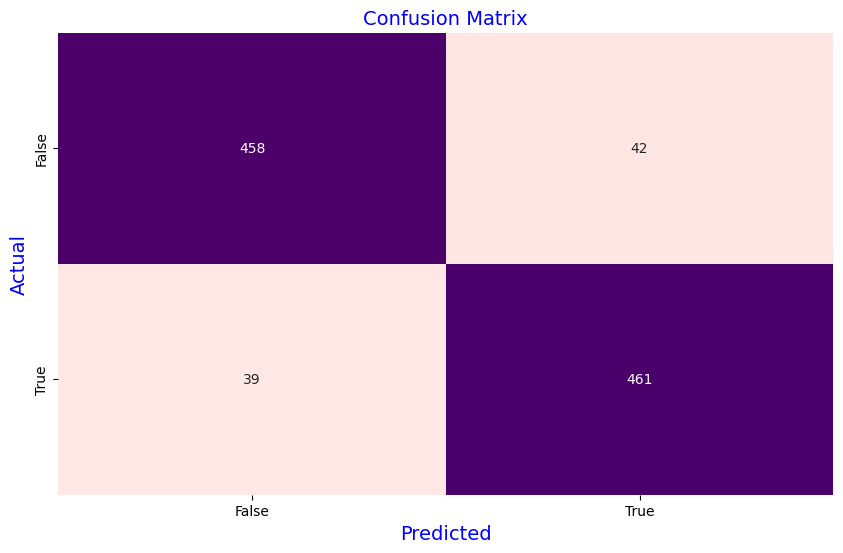

In [40]:
confmat_svm_Rbf = confusion_matrix(y_train_2,Rbf_svm_pred_valid)

print('confmat_sgd =>\n', confmat_svm_Rbf)

print('--'*30)


## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_svm_Rbf, fmt='g', annot=True, cbar=False, vmin=0, cmap='RdPu')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])   ## to only handle the names in proper way
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

In [41]:
## Precision and Recall score
precison_score_sgd = precision_score(y_train_2, Rbf_svm_pred_valid)
print('Precison Score using SGD =>', precison_score_sgd)

print('---'*20)

recall_score_sgd = recall_score(y_train_2, Rbf_svm_pred_valid)
print('Recall Score using SGD =>', recall_score_sgd)

print('---'*20)

class_repo_sgd = classification_report(y_train_2, Rbf_svm_pred_valid)
print('Classifcation Report using SGD => \n', class_repo_sgd)

Precison Score using SGD => 0.9165009940357853
------------------------------------------------------------
Recall Score using SGD => 0.922
------------------------------------------------------------
Classifcation Report using SGD => 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       500
           1       0.92      0.92      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

